In [37]:
# 데이터셋 불러오기

import pandas as pd
X = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')

# 데이터셋 확인

print(bike.shape)
X.info()

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
# datetime 변환 후 year, month, day, hour, minute, second 컬럼 생성

X['datetime'] = pd.to_datetime(X['datetime'])
X['year'] = X['datetime'].dt.year
X['month'] = X['datetime'].dt.month
X['day'] = X['datetime'].dt.day
X['hour'] = X['datetime'].dt.hour
X['minute'] = X['datetime'].dt.minute
X['second'] = X['datetime'].dt.second

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [42]:
X.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


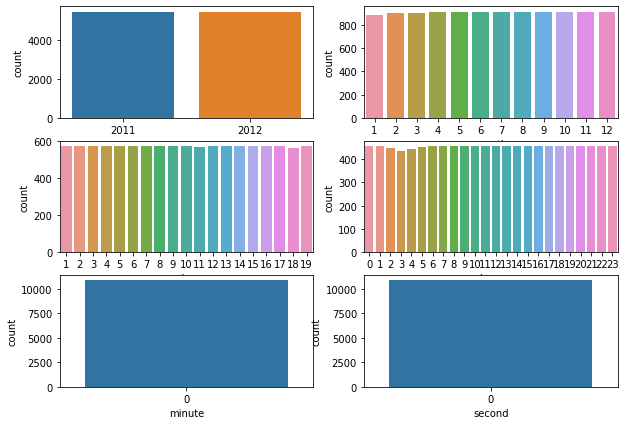

In [89]:
# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(3, 2, 1)
sns.countplot(x=X['year'], ax=ax1)

ax2 = fig.add_subplot(3, 2, 2)
sns.countplot(x=X['month'], ax=ax2)

ax3 = fig.add_subplot(3, 2, 3)
sns.countplot(x=X['day'], ax=ax3)

ax4 = fig.add_subplot(3, 2, 4)
sns.countplot(x=X['hour'], ax=ax4)

ax5 = fig.add_subplot(3, 2, 5)
sns.countplot(x=X['minute'], ax=ax5)

ax6 = fig.add_subplot(3, 2, 6)
sns.countplot(x=X['second'], ax=ax6)

plt.show()

In [74]:
# X, y 컬럼 선택

features = ['season','holiday','workingday','weather','temp','humidity','windspeed','year','month','day','hour']
target = ['count']

X_features = X[features]
y_target = X[target]

# train/test 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=42)

In [75]:
# LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# 예측값 출력

y_pred = model.predict(X_test)


# 손실함수 값 계산

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(predictions)
print(mse)
print(rmse)

[[239.50937953]
 [ 45.97499599]
 [207.43068266]
 ...
 [305.49147838]
 [ 39.42697714]
 [241.89089248]]
19962.939395049958
141.29026645544258


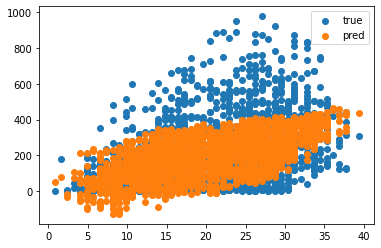

In [95]:
# 예측 시각화

plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.legend()
plt.show()

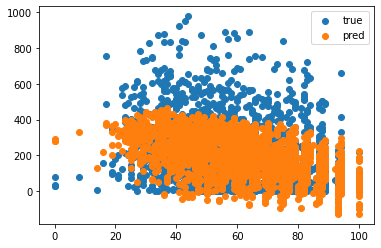

In [96]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()
plt.show()